In [2]:
import pandas as pd


In [3]:
path = r"data\violence_data.csv"
df = pd.read_csv(path)
df.head(20)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
5,1,Afghanistan,F,Employment,Employed for kind,... if she burns the food,01/01/2015,17.0
6,1,Afghanistan,F,Age,15-24,... if she burns the food,01/01/2015,17.3
7,1,Afghanistan,F,Employment,Unemployed,... if she burns the food,01/01/2015,18.0
8,1,Afghanistan,F,Residence,Rural,... if she burns the food,01/01/2015,18.1
9,1,Afghanistan,F,Age,25-34,... if she burns the food,01/01/2015,18.2


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


 Data preprocessing

In [5]:
df['Residence'] = df['Demographics Response'].apply(lambda response: response if response in ['Rural', 'Urban'] else None)
df['Marital status'] = df['Demographics Response'].apply(lambda response: response if response in ['Never married', 'Widowed, divorced, separated'] else None)
df['Education'] = df['Demographics Response'].apply(lambda response: response if response in ['No education','Primary','Secondary','Higher'] else None)
df['Employment'] = df['Demographics Response'].apply(lambda response: response if response in ['Employed for kind', 'Unemployed','Employed for cash'] else None)
df['Age'] = df['Demographics Response'].apply(lambda response: response if response in ['15-24','25-34','35-49'] else None)



In [6]:
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Residence,Marital status,Education,Employment,Age
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN,None,Never married,None,None,None
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1,None,None,Higher,None,None
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7,None,None,Secondary,None,None
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8,None,None,Primary,None,None
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8,None,"Widowed, divorced, separated",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8,Urban,None,None,None,None
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1,Rural,None,None,None,None
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0,Urban,None,None,None,None
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2,Rural,None,None,None,None


In [7]:

df = df.drop('Demographics Response', axis=1)
df = df.drop('Demographics Question', axis=1)



In [8]:
df.head(20)

,RecordID,Country,Gender,Question,Survey Year,Value,Residence,Marital status,Education,Employment,Age
0,1,Afghanistan,F,... if she burns the food,01/01/2015,NaN,None,Never married,None,None,None
1,1,Afghanistan,F,... if she burns the food,01/01/2015,10.1,None,None,Higher,None,None
2,1,Afghanistan,F,... if she burns the food,01/01/2015,13.7,None,None,Secondary,None,None
3,1,Afghanistan,F,... if she burns the food,01/01/2015,13.8,None,None,Primary,None,None
4,1,Afghanistan,F,... if she burns the food,01/01/2015,13.8,None,"Widowed, divorced, separated",None,None,None
5,1,Afghanistan,F,... if she burns the food,01/01/2015,17.0,None,None,None,Employed for kind,None
6,1,Afghanistan,F,... if she burns the food,01/01/2015,17.3,None,None,None,None,15-24
7,1,Afghanistan,F,... if she burns the food,01/01/2015,18.0,None,None,None,Unemployed,None
8,1,Afghanistan,F,... if she burns the food,01/01/2015,18.1,Rural,None,None,None,None
9,1,Afghanistan,F,... if she burns the food,01/01/2015,18.2,None,None,None,None,25-34


In [9]:
desired_order = ['RecordID','Gender','Country','Age','Education','Marital status','Employment','Residence','Survey Year','Question','Value']
df = df[desired_order]

In [10]:
df

,RecordID,Gender,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question,Value
0,1,F,Afghanistan,None,None,Never married,None,None,01/01/2015,... if she burns the food,NaN
1,1,F,Afghanistan,None,Higher,None,None,None,01/01/2015,... if she burns the food,10.1
2,1,F,Afghanistan,None,Secondary,None,None,None,01/01/2015,... if she burns the food,13.7
3,1,F,Afghanistan,None,Primary,None,None,None,01/01/2015,... if she burns the food,13.8
4,1,F,Afghanistan,None,None,"Widowed, divorced, separated",None,None,01/01/2015,... if she burns the food,13.8
...,...,...,...,...,...,...,...,...,...,...,...
12595,210,M,Zimbabwe,None,None,None,None,Urban,01/01/2015,... if she goes out without telling him,11.8
12596,280,M,Zimbabwe,None,None,None,None,Rural,01/01/2015,... if she neglects the children,20.1
12597,280,M,Zimbabwe,None,None,None,None,Urban,01/01/2015,... if she neglects the children,15.0
12598,350,M,Zimbabwe,None,None,None,None,Rural,01/01/2015,... if she refuses to have sex with him,7.2


In [11]:
import pandas as pd
from itertools import product

def generate_combinations(group):

    unique_values = {col: group[col].unique() for col in group.columns[3:10]}
    combinations = list(product(*unique_values.values()))

    result = pd.DataFrame(combinations, columns=unique_values.keys())

    result[group.columns[:3]] = group[group.columns[:3]].iloc[0]

    return result

result_df = df.groupby(['Country']).apply(generate_combinations).reset_index(drop=True)


result_df = result_df.dropna()

result_df


C:\Users\ASUS I5\AppData\Local\Temp\ipykernel_17612\3801828469.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result[group.columns[:3]] = group[group.columns[:3]].iloc[0]
C:\Users\ASUS I5\AppData\Local\Temp\ipykernel_17612\3801828469.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result[group.columns[:3]] = group[group.columns[:3]].iloc[0]
C:\Users\ASUS I5\AppData\Local\Temp\ipykernel_17612\3801828469.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

,Age,Education,Marital status,Employment,Residence,Survey Year,Question,RecordID,Gender,Country
1320,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she burns the food,1,F,Afghanistan
1321,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... for at least one specific reason,1,F,Afghanistan
1322,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she argues with him,1,F,Afghanistan
1323,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she goes out without telling him,1,F,Afghanistan
1324,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she neglects the children,1,F,Afghanistan
...,...,...,...,...,...,...,...,...,...,...
301315,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she argues with him,420,F,Zimbabwe
301316,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she burns the food,420,F,Zimbabwe
301317,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she goes out without telling him,420,F,Zimbabwe
301318,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she neglects the children,420,F,Zimbabwe


In [12]:
order_df = ['RecordID','Gender','Country','Age','Education','Marital status','Employment','Residence','Survey Year','Question']
result_df = result_df[order_df]

In [13]:
result_df

,RecordID,Gender,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
1320,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she burns the food
1321,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... for at least one specific reason
1322,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she argues with him
1323,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she goes out without telling him
1324,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,01/01/2015,... if she neglects the children
...,...,...,...,...,...,...,...,...,...,...
301315,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she argues with him
301316,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she burns the food
301317,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she goes out without telling him
301318,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,01/01/2015,... if she neglects the children


In [14]:
result_df['Survey Year'] = pd.to_datetime(result_df['Survey Year'])

In [15]:
result_df['Survey Year'] = result_df['Survey Year'].dt.year

In [16]:
result_df

,RecordID,Gender,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
1320,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she burns the food
1321,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... for at least one specific reason
1322,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she argues with him
1323,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she goes out without telling him
1324,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she neglects the children
...,...,...,...,...,...,...,...,...,...,...
301315,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she argues with him
301316,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she burns the food
301317,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she goes out without telling him
301318,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she neglects the children


In [17]:
result_df = result_df.reset_index(drop=True)
result_df

,RecordID,Gender,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
0,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she burns the food
1,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... for at least one specific reason
2,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she argues with him
3,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she goes out without telling him
4,1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she neglects the children
...,...,...,...,...,...,...,...,...,...,...
60475,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she argues with him
60476,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she burns the food
60477,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she goes out without telling him
60478,420,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she neglects the children


In [18]:
# albania_data = result_df[(result_df['Country'] == 'Albania') & (result_df['Employment'] == 'Employed for cash')]
# albania_data

,RecordID,Gender,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
864,2,F,Albania,15-24,Higher,Never married,Employed for cash,Urban,2017,... if she burns the food
865,2,F,Albania,15-24,Higher,Never married,Employed for cash,Urban,2017,... for at least one specific reason
866,2,F,Albania,15-24,Higher,Never married,Employed for cash,Urban,2017,... if she argues with him
867,2,F,Albania,15-24,Higher,Never married,Employed for cash,Urban,2017,... if she goes out without telling him
868,2,F,Albania,15-24,Higher,Never married,Employed for cash,Urban,2017,... if she neglects the children
...,...,...,...,...,...,...,...,...,...,...
1699,2,F,Albania,35-49,No education,"Widowed, divorced, separated",Employed for cash,Rural,2017,... for at least one specific reason
1700,2,F,Albania,35-49,No education,"Widowed, divorced, separated",Employed for cash,Rural,2017,... if she argues with him
1701,2,F,Albania,35-49,No education,"Widowed, divorced, separated",Employed for cash,Rural,2017,... if she goes out without telling him
1702,2,F,Albania,35-49,No education,"Widowed, divorced, separated",Employed for cash,Rural,2017,... if she neglects the children


In [19]:
result_df.drop('RecordID', axis=1, inplace=True)
result_df

,Gender,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
0,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she burns the food
1,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... for at least one specific reason
2,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she argues with him
3,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she goes out without telling him
4,F,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she neglects the children
...,...,...,...,...,...,...,...,...,...
60475,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she argues with him
60476,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she burns the food
60477,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she goes out without telling him
60478,F,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she neglects the children


In [20]:
order_df = ['Country','Age','Education','Marital status','Employment','Residence','Survey Year','Question']
result_df = result_df[order_df]
result_df

,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
0,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she burns the food
1,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... for at least one specific reason
2,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she argues with him
3,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she goes out without telling him
4,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she neglects the children
...,...,...,...,...,...,...,...,...
60475,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she argues with him
60476,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she burns the food
60477,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she goes out without telling him
60478,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she neglects the children


In [23]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
# result_df.Country.unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [26]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
result_df

,Country,Age,Education,Marital status,Employment,Residence,Survey Year,Question
0,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she burns the food
1,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... for at least one specific reason
2,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she argues with him
3,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she goes out without telling him
4,Afghanistan,15-24,Higher,Never married,Employed for kind,Rural,2015,... if she neglects the children
...,...,...,...,...,...,...,...,...
60475,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she argues with him
60476,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she burns the food
60477,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she goes out without telling him
60478,Zimbabwe,35-49,Secondary,"Widowed, divorced, separated",Unemployed,Urban,2015,... if she neglects the children


In [28]:
result_df = result_df.astype(str)
df = result_df

In [ ]:
# transactions = result_df.values.tolist()
# transactions

In [ ]:
# te = TransactionEncoder()
# te_ary = te.fit(transactions).transform(transactions)
# # te_ary
# te_ary.astype("int")
# # te.columns_
# df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
# # df_encoded
# frequent_itemset = apriori(df_encoded, min_support=0.05,use_colnames=True)
# frequent_itemset.sort_values(by="support", ascending=False)
# frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x:len(x))

# frequent_itemset

In [ ]:
# df_apriori_1 = frequent_itemset

In [ ]:
# df_apriori_1[(df_apriori_1['length'] >= 2) & (df_apriori_1['support'] >= 0.05)]


In [ ]:
# rules = association_rules(df_apriori_1, metric="confidence", min_threshold=0.1)
# rules

In [29]:
#Grouped by countries


def get_frequent_itemsets_by_country(df, country_name, min_support=0.1, min_length=2):
  country_transactions = df[df['Country'] == country_name].values.tolist()

  te = TransactionEncoder()
  te_ary = te.fit(country_transactions).transform(country_transactions)
  df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

  frequent_itemset = apriori(df_encoded, min_support=min_support,use_colnames=True)
  frequent_itemset = frequent_itemset.sort_values(by="support", ascending=False)
  frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x:len(x))

  result_df = frequent_itemset[(frequent_itemset['length'] >= min_length) & (frequent_itemset['support'] >= min_support)]

  return result_df

country_name = 'Albania'
result_for_country = get_frequent_itemsets_by_country(df, country_name)
result_for_country

,support,itemsets,length
45,1.000000,"(2017, Albania)",2
56,0.500000,"(2017, Widowed, divorced, separated)",2
162,0.500000,"(2017, Albania, Urban)",3
55,0.500000,"(2017, Urban)",2
159,0.500000,"(2017, Albania, Rural)",3
...,...,...,...
253,0.111111,"(Unemployed, 25-34, Albania, 2017)",4
40,0.111111,"(Unemployed, 15-24)",2
256,0.111111,"(2017, Albania, 35-49, Employed for cash)",4
257,0.111111,"(2017, Albania, Employed for kind, 35-49)",4


FP-growth algorithm

In [30]:
transactions = []

# Boucle à travers les lignes de result_df pour créer les transactions
for index, row in result_df.iterrows():
    transaction = [row['Country'], row['Age'], row['Education'], row['Marital status'], row['Employment'], row['Residence'], row['Survey Year'], row['Question']]
    transactions.append(transaction)


In [31]:
transactions

[['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Rural',
  '2015',
  '... if she burns the food'],
 ['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Rural',
  '2015',
  '... for at least one specific reason'],
 ['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Rural',
  '2015',
  '... if she argues with him'],
 ['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Rural',
  '2015',
  '... if she goes out without telling him'],
 ['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Rural',
  '2015',
  '... if she neglects the children'],
 ['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Rural',
  '2015',
  '... if she refuses to have sex with him'],
 ['Afghanistan',
  '15-24',
  'Higher',
  'Never married',
  'Employed for kind',
  'Urban',
  '2015',
  '... if she burns the food'],
 ['Afgha

In [32]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Encoder les transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Appliquer FP-Growth avec un support minimum de 0.1 
frequent_itemsets = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)




In [33]:
frequent_itemsets

,support,itemsets
0,0.500000,(Rural)
1,0.500000,(Never married)
2,0.333333,(Employed for kind)
3,0.333333,(15-24)
4,0.250000,(Higher)
...,...,...
73,0.166667,"(35-49, Never married)"
74,0.166667,"(Rural, 35-49)"
75,0.111111,"(Employed for kind, 35-49)"
76,0.166667,"(Urban, 35-49)"


In [34]:
from mlxtend.frequent_patterns import association_rules

# Utiliser la fonction association_rules avec les ensembles d'items fréquents
rules_fp = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5) #confiance de 500%
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Rural),"(Widowed, divorced, separated)",0.500000,0.5,0.250000,0.5,1.0,0.0,1.0,0.0
1,"(Widowed, divorced, separated)",(Rural),0.500000,0.5,0.250000,0.5,1.0,0.0,1.0,0.0
2,(Rural),(Never married),0.500000,0.5,0.250000,0.5,1.0,0.0,1.0,0.0
3,(Never married),(Rural),0.500000,0.5,0.250000,0.5,1.0,0.0,1.0,0.0
4,(Urban),(Never married),0.500000,0.5,0.250000,0.5,1.0,0.0,1.0,0.0
5,(Never married),(Urban),0.500000,0.5,0.250000,0.5,1.0,0.0,1.0,0.0
6,(Employed for kind),(Never married),0.333333,0.5,0.166667,0.5,1.0,0.0,1.0,0.0
7,(Employed for kind),(Rural),0.333333,0.5,0.166667,0.5,1.0,0.0,1.0,0.0
8,(Employed for kind),(Urban),0.333333,0.5,0.166667,0.5,1.0,0.0,1.0,0.0
9,(Employed for kind),"(Widowed, divorced, separated)",0.333333,0.5,0.166667,0.5,1.0,0.0,1.0,0.0


 visualisation la confiance des règles d'association générées  FP-Growth

In [35]:
print(rules_fp[['antecedents', 'consequents', 'confidence']])


                       antecedents                     consequents  confidence
0                          (Rural)  (Widowed, divorced, separated)         0.5
1   (Widowed, divorced, separated)                         (Rural)         0.5
2                          (Rural)                 (Never married)         0.5
3                  (Never married)                         (Rural)         0.5
4                          (Urban)                 (Never married)         0.5
5                  (Never married)                         (Urban)         0.5
6              (Employed for kind)                 (Never married)         0.5
7              (Employed for kind)                         (Rural)         0.5
8              (Employed for kind)                         (Urban)         0.5
9              (Employed for kind)  (Widowed, divorced, separated)         0.5
10                         (15-24)                 (Never married)         0.5
11                         (15-24)                  

1. Heatmap

C:\Users\ASUS I5\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


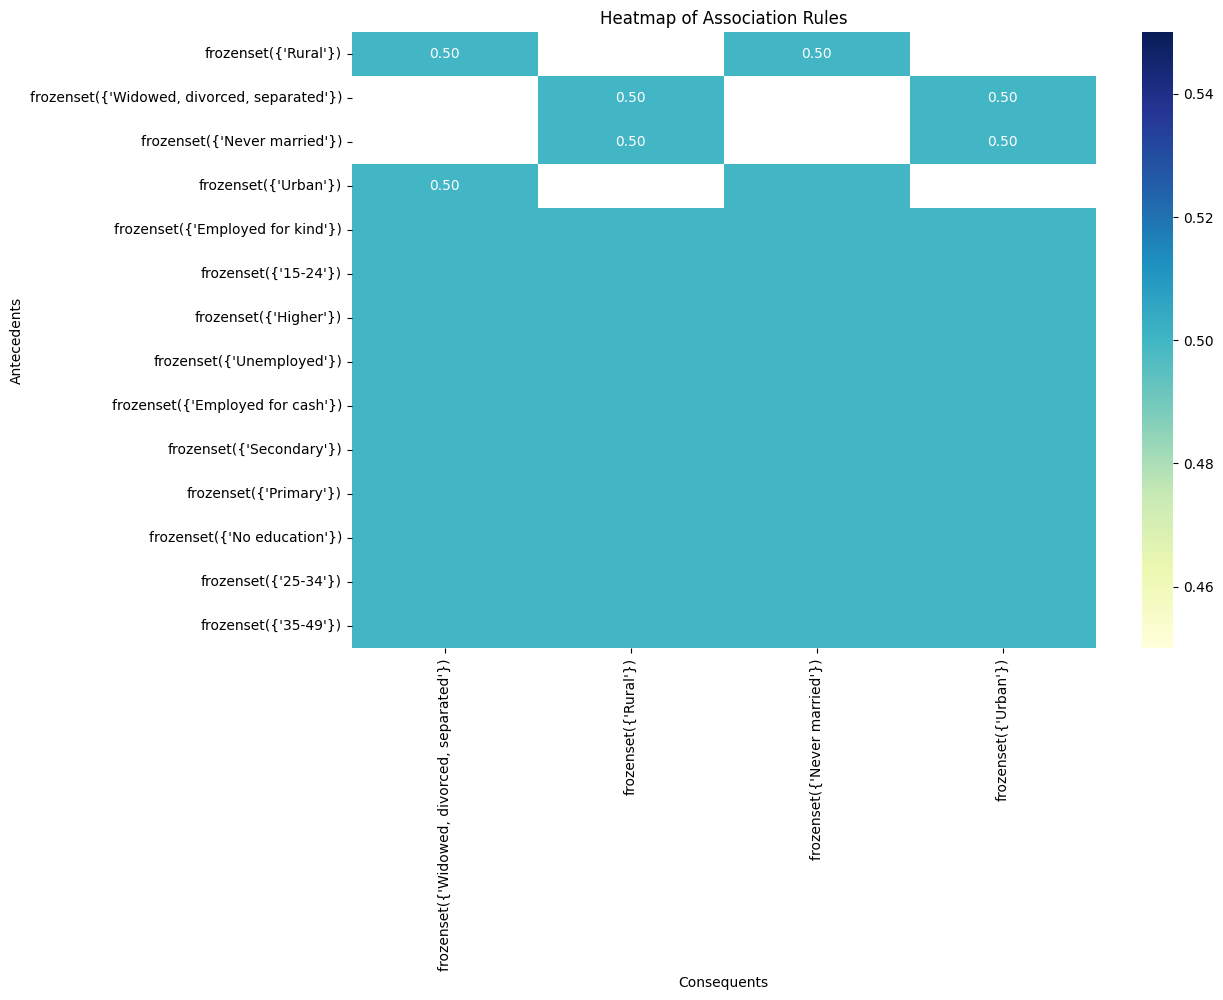

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = rules_fp.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


2. Network Graph


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphique
G = nx.DiGraph()

# Ajout des nœuds et des arêtes
for idx, row in rules_fp.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['confidence'])

# Affichage du graphique
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G)  # Définition de la disposition des nœuds (peut varier)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, edge_color='gray', width=2, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Association Rules Network Graph')
plt.show()


3. Bar Chart / Scatter Plot


In [ ]:
plt.figure(figsize=(12, 8))
confidence_values = rules_fp['confidence'].values.tolist()

# Convertir les frozensets en chaînes pour l'affichage
antecedents_str = [', '.join(list(rule)) for rule in rules_fp['antecedents']]
consequents_str = [', '.join(list(rule)) for rule in rules_fp['consequents']]
rules_str = [f"{antecedents_str[i]} -> {consequents_str[i]}" for i in range(len(antecedents_str))]

plt.bar(range(len(rules_fp)), confidence_values, color='skyblue')
plt.xticks(range(len(rules_fp)), rules_str, rotation=90)
plt.xlabel('Association Rules')
plt.ylabel('Confidence')
plt.title('Confidence of Association Rules')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rules_fp['support'], rules_fp['confidence'], s=rules_fp['support']*1000, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confiance')
plt.title('Support vs Confiance des règles d\'association extraites par Apriori')
plt.show()


In [ ]:
!git config --global user.email "yl.boudchicha@esi-sba.dz"
!git config --global user.name "Leyna911"
!git config --global user.password "Sunflower2001#"

In [ ]:
!git init

In [ ]:
!git add .

In [ ]:
!git commit -m "Apriori algorithm "


In [ ]:
!git remote add origin https://github.com/Leyna911/Violence_against_Women_and_Girls_Mini_Projet.git

In [ ]:
!git push -u origin master